In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json


In [ ]:
import os
import shutil

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)


In [3]:
!kaggle datasets download -d snap/amazon-fine-food-reviews
!unzip -q amazon-fine-food-reviews.zip


Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
amazon-fine-food-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
replace Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import pandas as pd

df = pd.read_csv("Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df = df[['Text', 'Score']]
df.columns = ['review', 'label']


In [6]:
df.head()



,review,label
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [7]:
def score_to_sentiment(score):
    if score <= 2:
        return 1  # negative
    else:
      return 2  # positive

df['label'] = df['label'].apply(score_to_sentiment)


In [8]:
df['review']=df['review'].str.lower()
#converting into lowercasing

In [9]:
df.head()

,review,label
0,i have bought several of the vitality canned d...,2
1,product arrived labeled as jumbo salted peanut...,1
2,this is a confection that has been around a fe...,2
3,if you are looking for the secret ingredient i...,1
4,great taffy at a great price. there was a wid...,2


In [10]:
!pip install -q textblob
import nltk
nltk.download('punkt')

from textblob import TextBlob


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
chat_words = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "gr8": "great",
    "b4": "before",
    "idk": "i do not know",
    "omg": "oh my god",
    "btw": "by the way",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "luv": "love",
    "k": "okay",
    "lol": "laughing",
    "brb": "be right back",
    "lmao": "laughing",
    "tbh": "to be honest",
    "wanna": "want to",
    "gonna": "going to",
    # Add more if needed
}


In [12]:
def correct_chat_and_spelling(text):
    # Correct chat words
    words = text.split()
    corrected_words = [chat_words.get(word, word) for word in words]
    text = ' '.join(corrected_words)

    # Spelling correction (skip very short texts to save time)
    if len(text.split()) < 20:
        text = str(TextBlob(text).correct())
    return text


In [13]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Emoji pattern
emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    u"\U0001F1E0-\U0001F1FF"
    u"\U00002700-\U000027BF"
    u"\U000024C2-\U0001F251"
"]+", flags=re.UNICODE)

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)                       # HTML
    text = re.sub(r'http\S+|www\.\S+', '', text)            # URLs
    text = emoji_pattern.sub(r'', text)                     # Emojis
    text = text.lower()                                     # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply to your DataFrame
df['review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df

,review,label
0,bought several vitality canned dog food produc...,2
1,product arrived labeled jumbo salted peanutsth...,1
2,confection around centuries light pillowy citr...,2
3,looking secret ingredient robitussin believe f...,1
4,great taffy great price wide assortment yummy ...,2
...,...,...
568449,great sesame chickenthis good better resturant...,2
568450,im disappointed flavor chocolate notes especia...,1
568451,stars small give 1015 one training session tri...,2
568452,best treats training rewarding dog good groomi...,2


In [15]:
# Keep only the first 100,000 rows (or any number you want)
df = df.head(100000)


In [16]:
# Get indices of first 100 rows with label 0
indices_to_remove = df[df['label'] == 2].index[:50000]

# Drop those rows
df = df.drop(indices_to_remove).reset_index(drop=True)
#now we have made our data equal so that our model can train on gud values

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='label'>

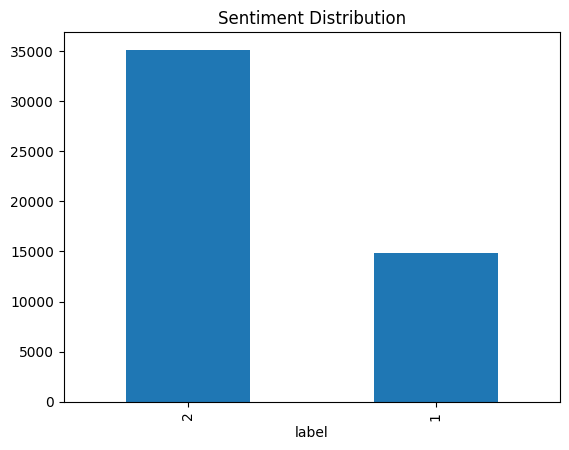

In [17]:
df['label'].value_counts().plot(kind='bar', title='Sentiment Distribution')


In [18]:
# Convert each review (string) to a list of tokens
sentences = df['review'].apply(lambda x: x.split()).tolist()


In [19]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


In [20]:

!pip install gensim numpy

In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
# Lemmatize each word in each review
def lemmatize_review(text):
    words = text.split()
    lemmas = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmas)

# Apply to your review column
df['review'] = df['review'].apply(lemmatize_review)


In [24]:
sentences = df['review'].apply(lambda x: x.split()).tolist()




In [25]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=2, sg=1, workers=4, epochs=10)

In [26]:
import numpy as np

def get_review_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vectors) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(vectors, axis=0)


In [27]:
# Tokenize again (if not already)
tokenized_reviews = df['review'].apply(lambda x: x.split())

# Convert each review to a vector
X_vectors = tokenized_reviews.apply(get_review_vector)

In [28]:
# Stack into matrix
X = np.stack(X_vectors.values)
y = df['label'].values

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, SimpleRNN, Masking

In [30]:
X.shape

(50000, 100)

In [31]:
import numpy as np

def words_to_sequences(tokenized_sentences, word_vectors, vector_size, max_len):
    padded_sequences = []

    for sentence in tokenized_sentences:
        seq = []
        for word in sentence:
            if word in word_vectors:
                seq.append(word_vectors[word])
            else:
                seq.append(np.zeros(vector_size))  # for unknown words
        # Padding
        while len(seq) < max_len:
            seq.append(np.zeros(vector_size))
        # Truncate if too long
        seq = seq[:max_len]
        padded_sequences.append(seq)

    return np.array(padded_sequences)


In [32]:
vector_size = 100  # whatever your Word2Vec embedding size is
max_len = 20       # your choice
X = words_to_sequences(sentences, X, vector_size, max_len)

print(X.shape)  # (num_sentences, max_len, vector_size)

(50000, 20, 100)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Masking, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam


In [35]:
input_shape = (X.shape[1], X.shape[2])  # (max_len, vector_size)


In [36]:
rnn_model = Sequential()
rnn_model.add(Masking(mask_value=0., input_shape=input_shape))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.3371 - loss: 0.3589 - val_accuracy: 0.1401 - val_loss: -0.7468
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3363 - loss: -0.7541 - val_accuracy: 0.1401 - val_loss: -1.8701
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3348 - loss: -1.6302 - val_accuracy: 0.1401 - val_loss: -2.8993
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3384 - loss: -2.4226 - val_accuracy: 0.1401 - val_loss: -3.9273
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.3373 - loss: -3.2250 - val_accuracy: 0.1401 - val_loss: -4.9721
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3342 - loss: -4.0538 - val_accuracy: 0.1401 - val_loss: -6.0269
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3376 - loss: -4.8479 - val_accuracy: 0.1401 - val_loss: -7.0904
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accur

In [37]:
lstm_model = Sequential()
lstm_model.add(Masking(mask_value=0., input_shape=input_shape))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.3376 - loss: 0.3599 - val_accuracy: 0.1401 - val_loss: -0.7472
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.3383 - loss: -0.7514 - val_accuracy: 0.1401 - val_loss: -1.8702
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.3366 - loss: -1.6260 - val_accuracy: 0.1401 - val_loss: -2.8998
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.3355 - loss: -2.4325 - val_accuracy: 0.1401 - val_loss: -3.9277
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.3399 - loss: -3.2132 - val_accuracy: 0.1401 - val_loss: -4.9742
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.3337 - loss: -4.0575 - val_accuracy: 0.1401 - val_loss: -6.0290
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.3393 - loss: -4.8365 - val_accuracy: 0.1401 - val_loss: -7.0929
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accur

In [38]:
gru_model = Sequential()
gru_model.add(Masking(mask_value=0., input_shape=input_shape))
gru_model.add(GRU(64))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gru_model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.3355 - loss: 0.3599 - val_accuracy: 0.1401 - val_loss: -0.7456
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.3373 - loss: -0.7517 - val_accuracy: 0.1401 - val_loss: -1.8687
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.3349 - loss: -1.6292 - val_accuracy: 0.1401 - val_loss: -2.8979
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.3365 - loss: -2.4281 - val_accuracy: 0.1401 - val_loss: -3.9263
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.3356 - loss: -3.2327 - val_accuracy: 0.1401 - val_loss: -4.9715
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.3399 - loss: -4.0184 - val_accuracy: 0.1401 - val_loss: -6.0287
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.3388 - loss: -4.8393 - val_accuracy: 0.1401 - val_loss: -7.0914
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accur